## CIS 635 Project

### Leveraging Data Mining to Understand and Predict Airbnb Listing Prices

#### Loading required libraries

In [77]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Downloading data from kaggle website

The data we are using for this project is hosted in kaggle. [U.S. Airbnb Open Data](https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data)

#### Downloading datasets in csv format

In [78]:
#Path to the dataset
path = kagglehub.dataset_download("kritikseth/us-airbnb-open-data")


Using Colab cache for faster access to the 'us-airbnb-open-data' dataset.


In [79]:
#Connecting to files in path
csv_path1 = os.path.join(path, "AB_US_2020.csv")
csv_path2 = os.path.join(path, "AB_US_2023.csv")
#Load the data from CSV files
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
#Previewing the two datasets
print(df1.describe())
print(df2.describe())

/tmp/ipython-input-798040142.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(csv_path1)
/tmp/ipython-input-798040142.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv_path2)


                 id       host_id       latitude      longitude  \
count  2.260300e+05  2.260300e+05  226030.000000  226030.000000   
mean   2.547176e+07  9.352385e+07      35.662829    -103.220662   
std    1.317814e+07  9.827422e+07       6.849855      26.222091   
min    1.090000e+02  2.300000e+01      18.920990    -159.714900   
25%    1.515890e+07  1.399275e+07      32.761783    -118.598115   
50%    2.590916e+07  5.138266e+07      37.261125     -97.817200   
75%    3.772624e+07  1.497179e+08      40.724038     -76.919323   
max    4.556085e+07  3.679176e+08      47.734620     -70.995950   

               price  minimum_nights  number_of_reviews  reviews_per_month  \
count  226030.000000    2.260300e+05      226030.000000       177428.00000   
mean      219.716529    4.525490e+02          34.506530            1.43145   
std       570.353609    2.103376e+05          63.602914            1.68321   
min         0.000000    1.000000e+00           0.000000            0.01000   
25%   

In [80]:
#checking the length of columns in df1 and df2
print(f'Columns in df1 = {len(df1.columns)}')
print(f'Columns in df2 = {len(df2.columns)}')

Columns in df1 = 17
Columns in df2 = 18


In [81]:
#Selecting columns common in both df1 and df2 before concatenating the dataframes
df1_cols = set(df1.columns)
df2_cols = set(df2.columns)

#Common columns
common = df1_cols & df2_cols
unique_to_df2 = df2_cols - df1_cols
print("Common columns:", common)
print("Columns unique to df2:", unique_to_df2)

Common columns: {'city', 'room_type', 'host_name', 'id', 'neighbourhood_group', 'reviews_per_month', 'availability_365', 'price', 'host_id', 'name', 'longitude', 'neighbourhood', 'minimum_nights', 'number_of_reviews', 'latitude', 'calculated_host_listings_count', 'last_review'}
Columns unique to df2: {'number_of_reviews_ltm'}


In [82]:
# Finding unique columns in df1 (columns that are in df1 but not in df2)
unique_df1 = df1_cols - df2_cols
print("\nColumns unique to df1:", unique_df1)
# Finding unique columns in df2 (columns that are in df2 but not in df1)
unique_df2 = df2_cols - df1_cols
print("\nColumns unique to df2:", unique_df2)


Columns unique to df1: set()

Columns unique to df2: {'number_of_reviews_ltm'}


In [83]:
#selecting only common columns in df2 to merge df1.
df2 = df2[list(common)]
len(df2.columns)

17

In [84]:
#concatenating df1 and df2
joined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
merged_df = joined_df.copy()

In [85]:
joined_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [86]:
joined_df.shape

(458177, 17)

The dataframe consists of 458177 entries and 17 variables.

In [87]:
#Checking the data types of various variables in the dataframe.
print(joined_df.info(show_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458177 entries, 0 to 458176
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   name                            object 
 2   host_id                         int64  
 3   host_name                       object 
 4   neighbourhood_group             object 
 5   neighbourhood                   object 
 6   latitude                        float64
 7   longitude                       float64
 8   room_type                       object 
 9   price                           int64  
 10  minimum_nights                  int64  
 11  number_of_reviews               int64  
 12  last_review                     object 
 13  reviews_per_month               float64
 14  calculated_host_listings_count  int64  
 15  availability_365                int64  
 16  city                            object 
dtypes: float64(3), int64(7), obje

#### Checking the number of missing values for every column in joined df

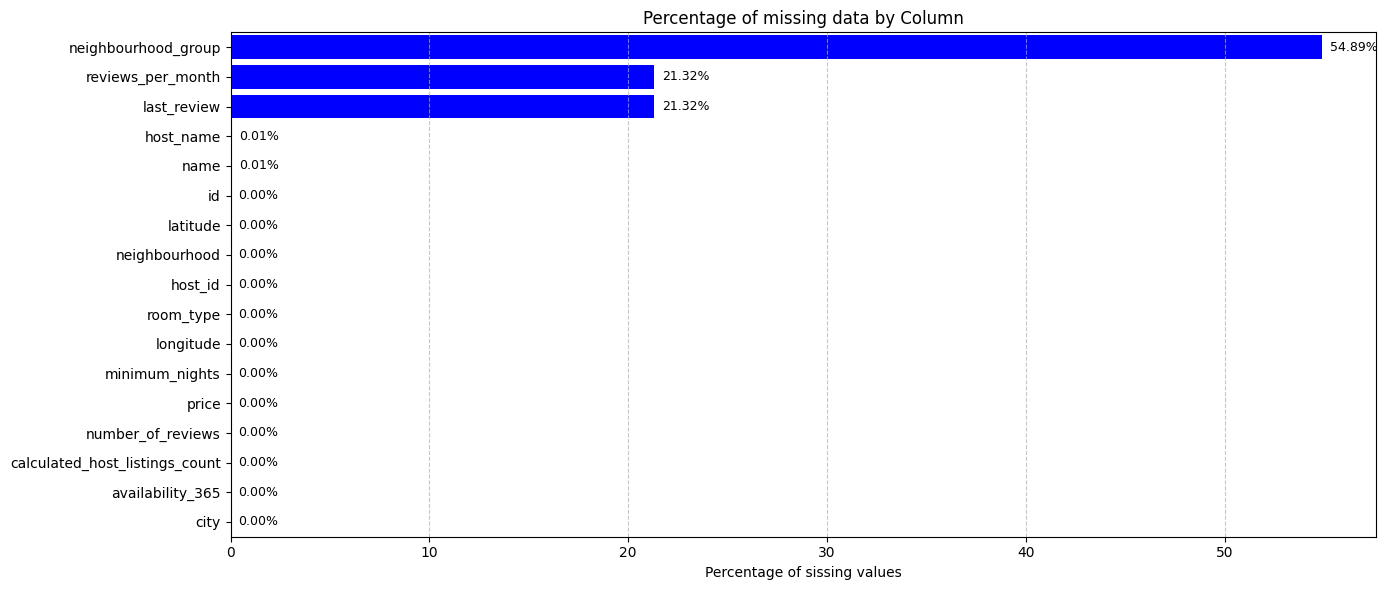

In [88]:
missing_counts = joined_df.isnull().sum()
missing_df = pd.DataFrame({'column': missing_counts.index,
                           'missing_percent': (missing_counts.values/len(joined_df))*100
                           })
missing_df = missing_df.sort_values(by='missing_percent', ascending=False)
plt.figure(figsize=(14, 6))
bars = plt.barh(missing_df['column'], missing_df['missing_percent'], color='blue')
plt.ylim(-0.5, len(missing_df['column']) - 0.5)
plt.xlabel('Percentage of sissing values')
plt.title('Percentage of missing data by Column')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar, percent in zip(bars, missing_df['missing_percent']):
    plt.text(percent + 0.4, bar.get_y() + bar.get_height()/2,
             f'{percent:.2f}%', va='center', fontsize=9)
plt.tight_layout()
plt.show()

Neighbourhood_group variable has the highest number of missing values at 54.89% of the total entries for neighbourhood_group. Reviews_per_month and last_review both have 21.32% of missing values. host_name and name have 0.01% of missing values which is negligible.

In [89]:
cleaned_df = joined_df.dropna()
cleaned_df.shape

(157742, 17)

The consequences of dropping missign values from the dataframe results to a reduction of the number of entries from 450,000 plus to 157742. What other ways do you suggest we consider?

Droping the neighbourhood group column instead of all the rows with missing data save most of the data.

For reviews_per_month and last_review, a NaN value mean it's just a blank space that logically means the listing has zero reviews. Instead of dropping these 21% of the listings, we fill the nulls with a logical value.

Last_review data will be used for feature engineering to create a new column called days_since_last_review by subtracting the last_review date from today's date. This gives us a number (e.g., "30 days," "400 days").The NaN values in last_review (for listings with 0 reviews) will also be NaN in the new days_since_last_review column. We can fix this by filling these nulls with the median (average) value of the new column.

By switching from dropping all rows to this we solve the data loss problem and keep over 400,000 rows in our dataset.





In [90]:
recleaned_df= joined_df.drop(columns=['neighbourhood_group'])
recleaned_df['reviews_per_month'].fillna(0, inplace=True)
recleaned_df.shape

/tmp/ipython-input-624368456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recleaned_df['reviews_per_month'].fillna(0, inplace=True)


(458177, 16)

Most numeric columns in the dataset are highly right-skewed, particularly price, minimum_nights, and calculated_host_listings_count, indicating a few extreme high values. In contrast, latitude, longitude, and availability are roughly symmetrical, while the ID columns are skewed but not meaningful for analysis.

In [91]:
# Checking for the logical consistency of the variables for reasonable ranges
print("Logical Consistency Checks")
# Check 'price' for invalid values
if 'price' in recleaned_df.columns:
    invalid_prices = recleaned_df[recleaned_df['price'] <= 0]
    print(f"Listings with invalid price values (<=0): {len(invalid_prices)}")
# Check 'minimum_nights' for reasonable range
if 'minimum_nights' in recleaned_df.columns:
    print(f"Minimum nights range: {recleaned_df['minimum_nights'].min()} - {recleaned_df['minimum_nights'].max()}")
# Check 'number_of_reviews' for reasonable range
if 'number_of_reviews' in recleaned_df.columns:
    print(f"Number of reviews range: {recleaned_df['number_of_reviews'].min()} - {recleaned_df['number_of_reviews'].max()}")
# Check 'reviews_per_month' for reasonable range
if 'reviews_per_month' in recleaned_df.columns:
    print(f"Reviews per month range: {recleaned_df['reviews_per_month'].min()} - {recleaned_df['reviews_per_month'].max()}")
# Check 'calculated_host_listings_count' for reasonable range
if 'calculated_host_listings_count' in recleaned_df.columns:
    print(f"Host listings count range: {recleaned_df['calculated_host_listings_count'].min()} - {recleaned_df['calculated_host_listings_count'].max()}")
# Check 'availability_365' for reasonable range
if 'availability_365' in recleaned_df.columns:
    print(f"Availability 365 range: {recleaned_df['availability_365'].min()} - {recleaned_df['availability_365'].max()}")
# Check 'latitude' and 'longitude' for geographic bounds
if 'latitude' in recleaned_df.columns:
    print(f"Latitude range: {recleaned_df['latitude'].min()} - {recleaned_df['latitude'].max()}")
if 'longitude' in recleaned_df.columns:
    print(f"Longitude range: {recleaned_df['longitude'].min()} - {recleaned_df['longitude'].max()}")


Logical Consistency Checks
Listings with invalid price values (<=0): 140
Minimum nights range: 1 - 100000000
Number of reviews range: 0 - 3091
Reviews per month range: 0.0 - 101.42
Host listings count range: 1 - 1003
Availability 365 range: 0 - 365
Latitude range: 18.92099 - 47.73462
Longitude range: -159.7149 - -70.99595


##outlier handling

OUTLIER HANDLING STRATEGY: QUANTILE CAPPING

Z-score makes a critical assumption: that the data is normally distributed.
Our 'price' data  is heavily right-skewed.
If we used a Z-score, the skewed mean would cause the Z-score to incorrectly label thousands of real, valid (but expensive)
listings as "outliers," leading to massive data loss.

QUANTILE CAPPING:
1. PREVENTS DATA LOSS: We only remove a tiny, specific fraction.
2. RETAINS VALID DATA: We *keep* all the "real" expensive listings
doesn't care about the data's distribution or mean.
By capping at the 99.5th percentile, we are making a targeted, surgical decision to remove only the top 0.5% of listings, removing the "impossible" values (like $100,000 listings)
This:




Shape before outlier handling: (453653, 16)
Filtered to top 15 cities. Shape for 'BEFORE' plot: (385050, 16)
   - 'price_by_city_before.png' saved.


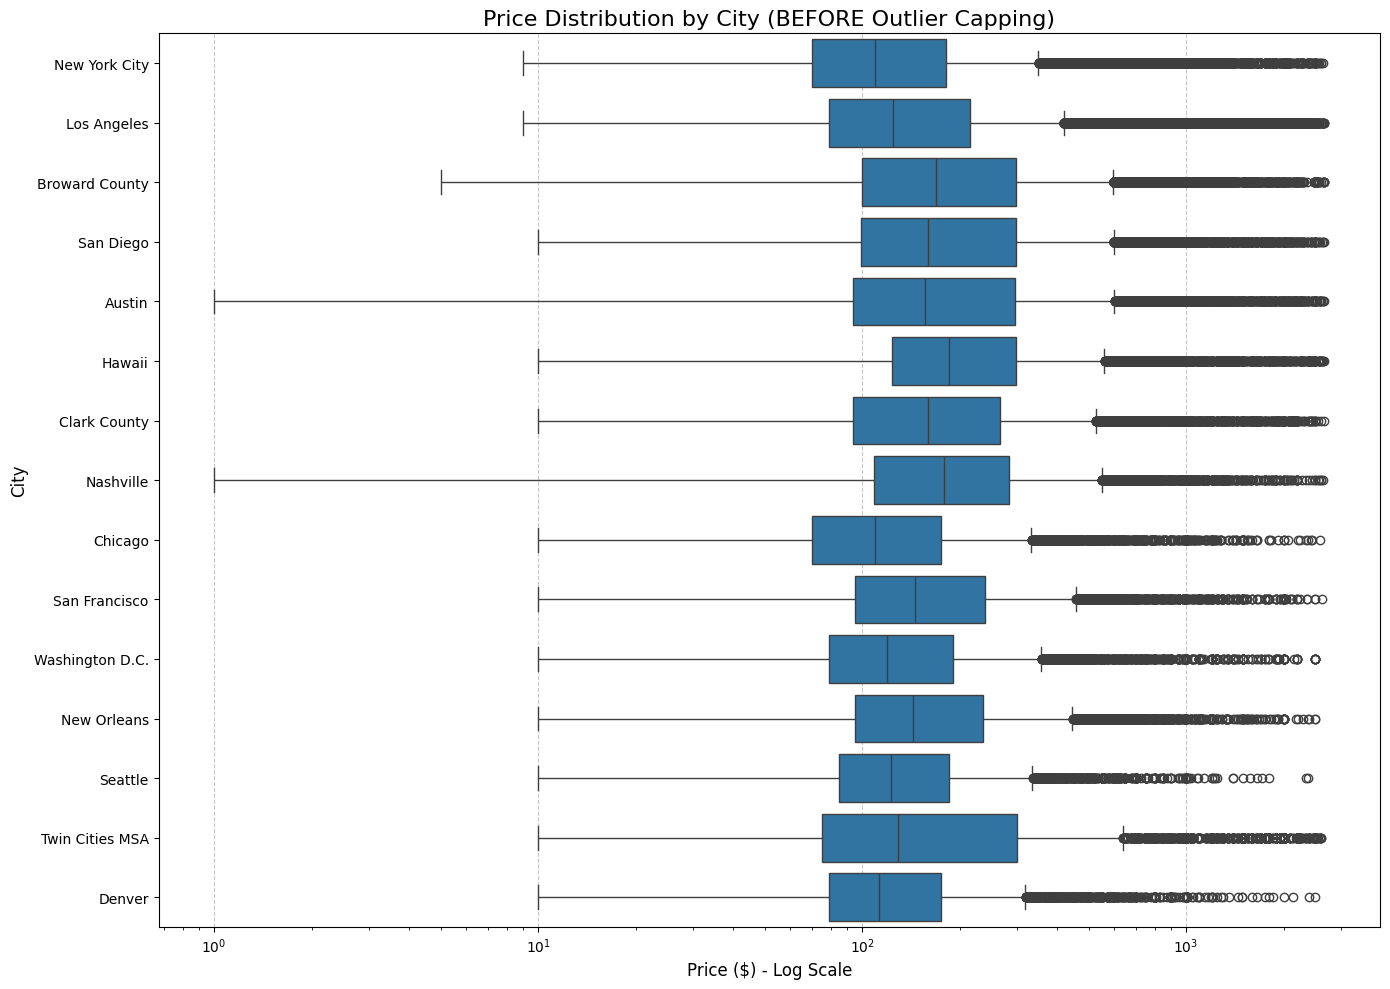

In [98]:
# Handle Invalid Data
recleaned_df = recleaned_df[recleaned_df['price'] > 0]
print(f"Shape before outlier handling: {recleaned_df.shape}")

# plot for the top 15 cities
top_15_cities = recleaned_df['city'].value_counts().nlargest(15).index

# BEFORE DataFrame, filtered to *only* these top cities
df_before = recleaned_df[recleaned_df['city'].isin(top_15_cities)]
print(f"Filtered to top 15 cities. Shape for 'BEFORE' plot: {df_before.shape}")

#BEFORE Visualization
plt.figure(figsize=(14, 10))
sns.boxplot(
    data=df_before,
    y='city',
    x='price',
    order=top_15_cities
)
plt.title('Price Distribution by City (BEFORE Outlier Capping)', fontsize=16)
plt.xlabel('Price ($) - Log Scale', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xscale('log')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_by_city_before.png')
print("   - 'price_by_city_before.png' saved.")

In [99]:
print(f"Shape before outlier handling: {recleaned_df.shape}")

#Remove listings with a $0 price, which are invalid data for a price prediction model.
initial_rows = recleaned_df.shape[0]
recleaned_df = recleaned_df[recleaned_df['price'] > 0]
rows_removed = initial_rows - recleaned_df.shape[0]
print(f"   - Removed {rows_removed} listings with invalid $0 price.")

#Handle Extreme Outliers (99.5th Percentile Capping)
#removes the most extreme 0.5% of listings for'price' and 'minimum_nights' to prevent "impossible" values
# (like $100,000) from skewing the model.
initial_rows = recleaned_df.shape[0]

# Calculate the 99.5th percentile "cap"
price_cap = recleaned_df['price'].quantile(0.995)
nights_cap = recleaned_df['minimum_nights'].quantile(0.995)
print(f"   - Capping 'price' at 99.5th percentile: ${price_cap:,.2f}")
print(f"   - Capping 'minimum_nights' at 99.5th percentile: {nights_cap:.0f} nights")

# Filter the DataFrame to keep only rows *below* or *at* the cap
recleaned_df = recleaned_df[
    (recleaned_df['price'] <= price_cap) &
    (recleaned_df['minimum_nights'] <= nights_cap)
]
rows_removed = initial_rows - recleaned_df.shape[0]

print(f"   - Removed {rows_removed} extreme outlier listings (top 0.5%).")
print(f"Shape after outlier handling: {recleaned_df.shape}")

Shape before outlier handling: (453653, 16)
   - Removed 0 listings with invalid $0 price.
   - Capping 'price' at 99.5th percentile: $1,780.00
   - Capping 'minimum_nights' at 99.5th percentile: 91 nights
   - Removed 2820 extreme outlier listings (top 0.5%).
Shape after outlier handling: (450833, 16)



--- Applied 99.5th Percentile Capping ---
   - 'AFTER' plot shape: (382486, 16)

 After plots for Price


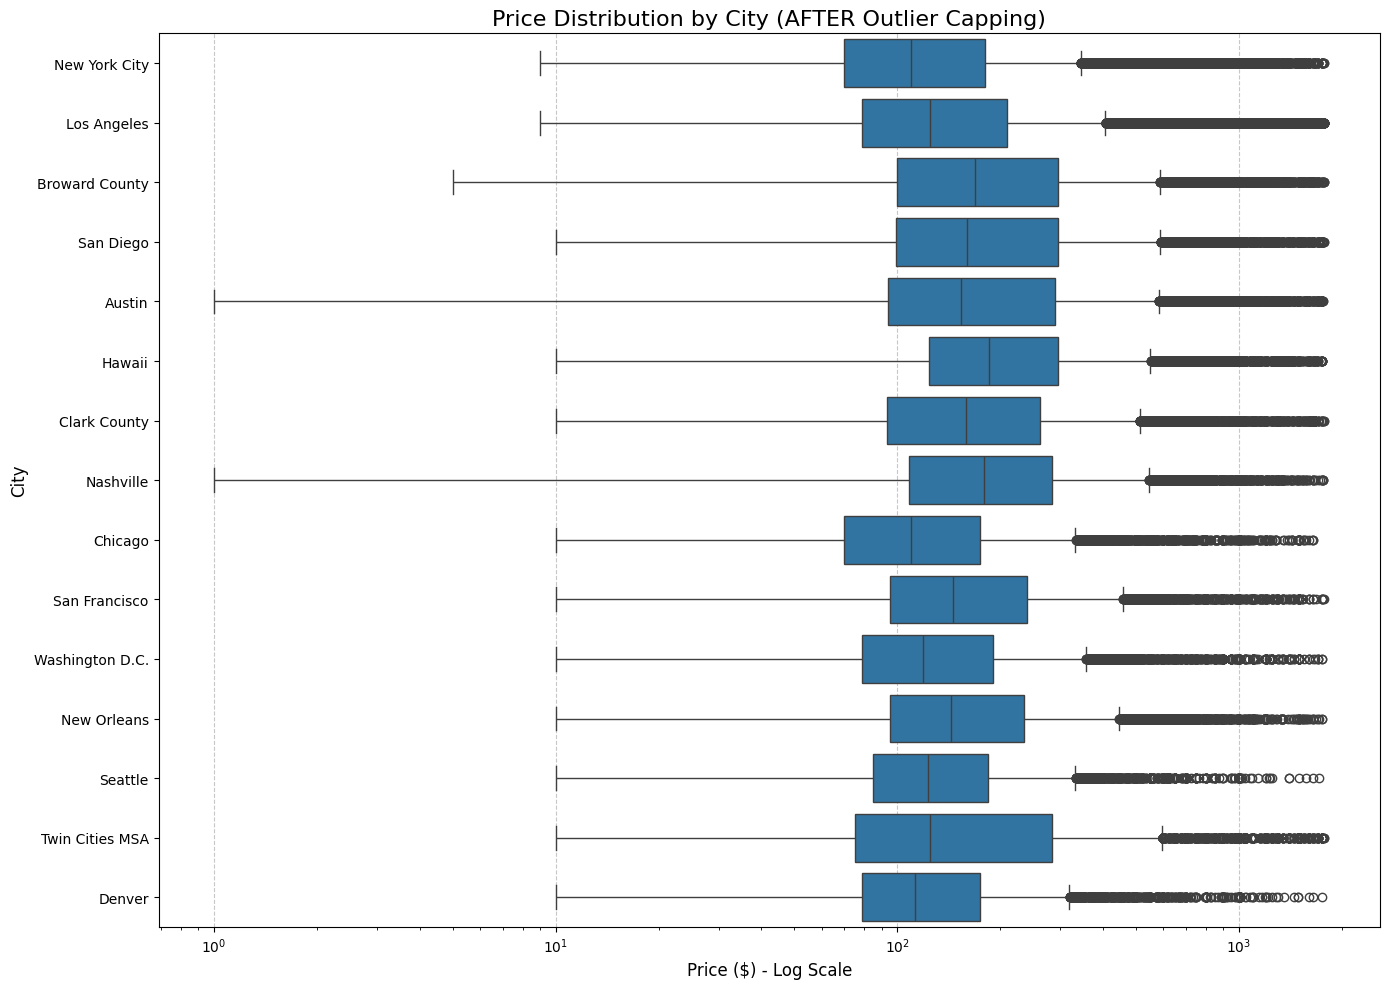

In [100]:
#removes the top 0.5% of impossible outliers
#dataframe for after plot
df_after = df_before[
    (df_before['price'] <= price_cap) &
    (df_before['minimum_nights'] <= nights_cap)
]
print(f"\n--- Applied 99.5th Percentile Capping ---")
print(f"   - 'AFTER' plot shape: {df_after.shape}")

#AFTER Visualization
plt.figure(figsize=(14, 10))
sns.boxplot(
    data=df_after,
    y='city',
    x='price',
    order=top_15_cities
)
plt.title('Price Distribution by City (AFTER Outlier Capping)', fontsize=16)
plt.xlabel('Price ($) - Log Scale', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xscale('log') # Log scale is essential
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_by_city_after.png')

print("\n After plots for Price")